Завдання 1.
Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням
https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)
Провести попередній аналіз даних, а саме:
1. Вивести перших 5 рядків

In [74]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]

print(df.head())


  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


2. Визначити розмір датасета.


In [24]:
print(df.shape)


(210, 7)


3. Визначити оптимальну кількість стовпців

In [25]:
# Вивести імена стовпців
print(df.columns)


MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )


4. Змінити назви стовпців на більш зручні, наприклад
Country MVF_2024 WorldBank_2023 OON_2022

In [73]:
df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022', 'Additional_Column']
print(df.columns)





Index(['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022',
       'Additional_Column'],
      dtype='object')


5. Визначити тип даних.

In [44]:
print(df.dtypes)


Country           object
MVF_2024          object
WorldBank_2023    object
OON_2022          object
dtype: object


6. Замініть у таблиці значення "—" на значення NaN. Перевірити
наявність пропущених значень. При наявності, замінити пропущені
значення на середнє значення.

In [67]:
df.replace("—", pd.NA, inplace=True)
print(df.isna().sum())

df = df.fillna(df.mean(numeric_only=True))

print(df.isna().sum())


Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          1
Difference        0
dtype: int64
Country           0
MVF_2024          0
WorldBank_2023    0
OON_2022          1
Difference        0
dtype: int64


<ipython-input-67-424f9e9a208a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("—", pd.NA, inplace=True)


7. Ще раз перевірити наявність пропущених значень

In [46]:
print(df.isna().sum())


Country            0
MVF_2024          15
WorldBank_2023     8
OON_2022           1
dtype: int64


8. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [47]:
print(df.duplicated().sum())
df = df.drop_duplicates()


0


9. Вивести описову статистику датасету describe()

In [48]:
print(df.describe())


       Country   MVF_2024 WorldBank_2023   OON_2022
count      210        195            202        209
unique     210        195            202        209
top      World  109529216      105435540  100834796
freq         1          1              1          1


10.Визначте відхилення (різницю) між показниками MVF_2024 та
WorldBank_2023 для кожної країни. У яких країнах ці показники
найбільше відрізняються (дати відповідт)?

In [66]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]

df.columns = ['Country_Territory', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']

df = df[['Country_Territory', 'IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']]

df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')

df['MVF_2024'].fillna(df['MVF_2024'].mean(), inplace=True)
df['WorldBank_2023'].fillna(df['WorldBank_2023'].mean(), inplace=True)

df['Difference'] = df['MVF_2024'] - df['WorldBank_2023']

max_diff_country = df.loc[df['Difference'].idxmax()]['Country']
min_diff_country = df.loc[df['Difference'].idxmin()]['Country']

print(f"Найбільша різниця у країні: {max_diff_country}")
print(f"Найменша різниця у країні: {min_diff_country}")


Найбільша різниця у країні: World
Найменша різниця у країні: South Sudan


<ipython-input-66-d2896e1c63d8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
<ipython-input-66-d2896e1c63d8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
<ipython-input-66-d2896e1c63d8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
OON_2022. Які пари змінних мають найвищу кореляцію?


In [65]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"
tables = pd.read_html(url)
df = tables[2]

df.columns = ['Country_Territory', 'IMF_Forecast', 'IMF_Year', 'WorldBank_Estimate', 'WorldBank_Year', 'UN_Estimate', 'UN_Year']

df = df[['Country_Territory', 'IMF_Forecast', 'WorldBank_Estimate', 'UN_Estimate']]

df.columns = ['Country', 'MVF_2024', 'WorldBank_2023', 'OON_2022']

df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
df['OON_2022'] = pd.to_numeric(df['OON_2022'], errors='coerce')

df['MVF_2024'].fillna(df['MVF_2024'].mean(), inplace=True)
df['WorldBank_2023'].fillna(df['WorldBank_2023'].mean(), inplace=True)
df['OON_2022'].fillna(df['OON_2022'].mean(), inplace=True)

correlation = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation)


                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000


<ipython-input-65-5afe1bb10864>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MVF_2024'] = pd.to_numeric(df['MVF_2024'], errors='coerce')
<ipython-input-65-5afe1bb10864>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WorldBank_2023'] = pd.to_numeric(df['WorldBank_2023'], errors='coerce')
<ipython-input-65-5afe1bb10864>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
WorldBank_2023, OON_2022). Як це середнє значення змінюється між
роками?

In [53]:
means = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print(means)


MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


13.Обчисліть стандартне відхилення показників для кожної країни. Яка
країна має найвищу варіативність у показниках між роками?


In [54]:
df['Std_Dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)
max_var_country = df.loc[df['Std_Dev'].idxmax()]['Country']
print(f"Країна з найвищою варіативністю: {max_var_country}")


Країна з найвищою варіативністю: World


<ipython-input-54-81bb61fd7841>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Std_Dev'] = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std(axis=1)


14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
країну з найвищим та найнижчим показниками у кожному з років
(MVF_2024, WorldBank_2023, OON_2022).

In [60]:
max_MVF_2024 = df.loc[df['MVF_2024'].idxmax()]['Country']
min_MVF_2024 = df.loc[df['MVF_2024'].idxmin()]['Country']
max_WorldBank_2023 = df.loc[df['WorldBank_2023'].idxmax()]['Country']
min_WorldBank_2023 = df.loc[df['WorldBank_2023'].idxmin()]['Country']
max_OON_2022 = df.loc[df['OON_2022'].idxmax()]['Country']
min_OON_2022 = df.loc[df['OON_2022'].idxmin()]['Country']

print(f"Найвищий у MVF_2024: {max_MVF_2024}")
print(f"Найнижчий у MVF_2024: {min_MVF_2024}")
print(f"Найвищий у WorldBank_2023: {max_WorldBank_2023}")
print(f"Найнижчий у WorldBank_2023: {min_WorldBank_2023}")
print(f"Найвищий у OON_2022: {max_OON_2022}")
print(f"Найнижчий у OON_2022: {min_OON_2022}")


Найвищий у MVF_2024: United States
Найнижчий у MVF_2024: Tuvalu
Найвищий у WorldBank_2023: United States
Найнижчий у WorldBank_2023: Tuvalu
Найвищий у OON_2022: United States
Найнижчий у OON_2022: Tuvalu


15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
країн. Який вигляд має розподіл? Чи є країни, що виділяються?

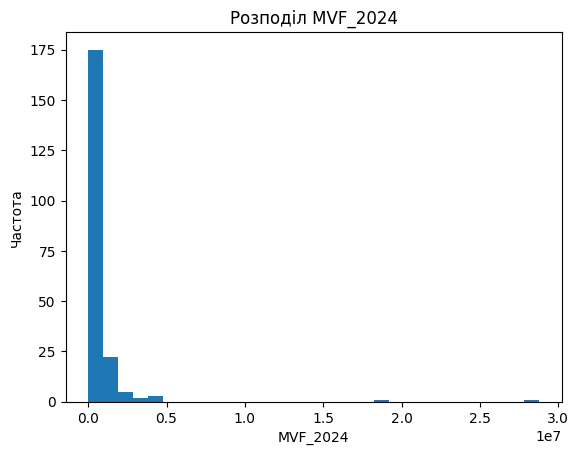

In [61]:
import matplotlib.pyplot as plt

plt.hist(df['MVF_2024'], bins=30)
plt.title('Розподіл MVF_2024')
plt.xlabel('MVF_2024')
plt.ylabel('Частота')
plt.show()


16.Розрахуйте частку кожної країни в загальному значенні для кожного
року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
країн з часом (дати відповідь)?

In [63]:
total_MVF_2024 = df['MVF_2024'].sum()
total_WorldBank_2023 = df['WorldBank_2023'].sum()
total_OON_2022 = df['OON_2022'].sum()

df['Share_MVF_2024'] = df['MVF_2024'] / total_MVF_2024
df['Share_WorldBank_2023'] = df['WorldBank_2023'] / total_WorldBank_2023
df['Share_OON_2022'] = df['OON_2022'] / total_OON_2022

print(df[['Country', 'Share_MVF_2024', 'Share_WorldBank_2023', 'Share_OON_2022']])


              Country  Share_MVF_2024  Share_WorldBank_2023  Share_OON_2022
1       United States    2.277911e-01          2.434729e-01    2.548117e-01
2               China    1.466786e-01          1.583479e-01    1.777971e-01
3             Germany    3.633677e-02          3.965270e-02    4.035284e-02
4               Japan    3.253263e-02          3.748914e-02    4.188948e-02
5               India    3.115991e-02          3.158916e-02    3.430146e-02
..                ...             ...                   ...             ...
205          Kiribati    2.461444e-06          2.482698e-06    2.207224e-06
206             Palau    2.437700e-06          2.340321e-06    2.227020e-06
207  Marshall Islands    2.413956e-06          2.527191e-06    2.761505e-06
208             Nauru    1.274252e-06          1.370378e-06    1.454986e-06
209            Tuvalu    5.223643e-07          5.517106e-07    5.839741e-07

[209 rows x 4 columns]


17.Візуалізуйте зміни в показниках для кожної країни за три роки на
графіку. Які країни показують стабільне зростання або спад (дати
відповідь)?

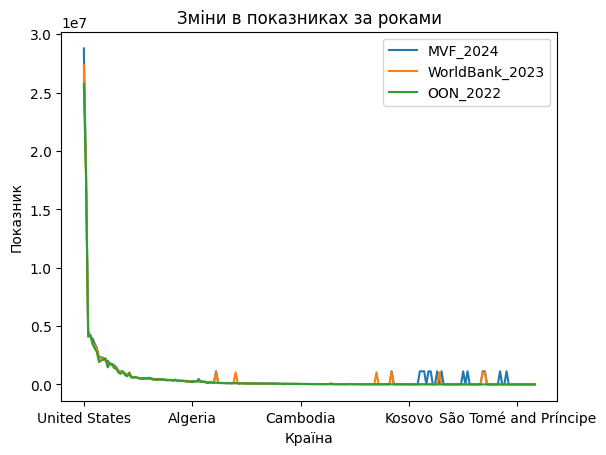

In [64]:
df.set_index('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].plot()
plt.title('Зміни в показниках за роками')
plt.xlabel('Країна')
plt.ylabel('Показник')
plt.show()


Висновок : З цього завдання я навчився ефективно очищати та обробляти дані з MultiIndex, перетворювати стовпці на числові значення, заповнювати пропущені дані та обчислювати кореляції і частки для різних показників ВВП країн.

Завдання 2. Завантажити датасет Титанік з Kaggle (або
використовуйте вже завантажений файл titanic.csv)
Виконати попередній аналіз даних.
1. Вивести перших 5 рядків

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')

print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


2. Визначити розмір датасета

In [126]:
print(f'Розмір датасету: {df.shape}')

Розмір датасету: (418, 12)


3. Визначити тип даних

In [127]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


4. Визначити наявність пропущених значень. При наявності, замінити
пропущені значення на середнє значення.

In [128]:
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


5. Ще раз перевірити наявність пропущених значень.

In [129]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


6. Перевірити наявність дублікатів. При наявності видалити дублікати.

In [130]:
print(f'Кількість дублікатів: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)

Кількість дублікатів: 0


7. Вивести описову статистику датасету describe()

In [131]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   12.634534    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   30.272590    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.627188  
std      0.981429   55.840500  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


8. Видалити стовпчик Cabin

In [132]:
df.drop(columns=['Cabin'], inplace=True)

9. Сформувати датасет з обраними стовпцями:
['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]


In [133]:
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]

10.Замінити бінарні ознаки (Стать) на 0 і 1 (але перевірте унікальні
значення даного стовпчика).

In [134]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

11.Ще раз перевірити кількість пропущених даних (впевнитись, що їх
немає).

In [135]:
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64


12.Вивести 5 перших рядків датасету.

In [136]:
print(df.head())

   Survived  Pclass  Sex   Age     Fare
0         0       3    0  34.5   7.8292
1         1       3    1  47.0   7.0000
2         0       2    0  62.0   9.6875
3         0       3    0  27.0   8.6625
4         1       3    1  22.0  12.2875


13.Вивести 5 останніх рядків датасету

In [137]:
print(df.tail())

     Survived  Pclass  Sex       Age      Fare
413         0       3    0  30.27259    8.0500
414         1       1    1  39.00000  108.9000
415         0       3    0  38.50000    7.2500
416         0       3    0  30.27259    8.0500
417         0       3    0  30.27259   22.3583


14.Аналіз виживання залежно від статі: Обчисліть відсоток виживання
для кожної статі. Чи була різниця у виживанні між чоловіками та
жінками?

In [138]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(f'Відсоток виживання за статтю:\n{survival_by_sex}')

Відсоток виживання за статтю:
Sex
0    0.0
1    1.0
Name: Survived, dtype: float64


15.Обчисліть відсоток виживання для кожного класу (Pclass). Який
клас мав найвищий рівень виживання (дати відповідь)?

In [139]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print(f'Відсоток виживання за класом:\n{survival_by_pclass}')

Відсоток виживання за класом:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


16. Визначте середній вік тих, хто вижив, і тих, хто не вижив. Чи
впливає вік на виживання (дати відповідь)?

In [140]:
avg_age_by_survival = df.groupby('Survived')['Age'].mean()
print(f'Середній вік за виживанням:\n{avg_age_by_survival}')

Середній вік за виживанням:
Survived
0    30.272699
1    30.272400
Name: Age, dtype: float64


17. Розподіліть пасажирів на групи за рівнями тарифів (Fare) і
обчисліть рівень виживання для кожної групи. Як тариф впливав на
шанси виживання (дати відповідь)?

In [141]:
fare_bins = pd.cut(df['Fare'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, df['Fare'].max()])
survival_by_fare_bin = df.groupby(fare_bins)['Survived'].mean()
print(f'Рівень виживання за групами тарифів:\n{survival_by_fare_bin}')

Рівень виживання за групами тарифів:
Fare
(0.0, 10.0]         0.274510
(10.0, 20.0]        0.317073
(20.0, 30.0]        0.408451
(30.0, 40.0]        0.454545
(40.0, 50.0]        0.250000
(50.0, 60.0]        0.555556
(60.0, 70.0]        0.545455
(70.0, 80.0]        0.300000
(80.0, 90.0]        0.625000
(90.0, 100.0]       0.000000
(100.0, 512.329]    0.612903
Name: Survived, dtype: float64


<ipython-input-141-4f3c8c80da11>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_fare_bin = df.groupby(fare_bins)['Survived'].mean()


18.Аналіз класу та тарифу: Визначте середній тариф (Fare) для кожного
класу (Pclass). Чи існує значна різниця у тарифах між класами (дати
відповідь)?

In [142]:
avg_fare_by_pclass = df.groupby('Pclass')['Fare'].mean()
print(f'Середній тариф за класом:\n{avg_fare_by_pclass}')

Середній тариф за класом:
Pclass
1    94.280297
2    22.202104
3    12.565951
Name: Fare, dtype: float64


19. Обчисліть середній вік пасажирів для кожного класу (Pclass). Як вік
пасажирів розподіляється за класами (дати відповідь)?

In [143]:
avg_age_by_pclass = df.groupby('Pclass')['Age'].mean()
print(f'Середній вік за класом:\n{avg_age_by_pclass}')

Середній вік за класом:
Pclass
1    40.022928
2    28.857881
3    26.090397
Name: Age, dtype: float64


20.Побудуйте гістограму розподілу віку для тих, хто вижив, і тих, хто
не вижив. Чи є видимі відмінності у вікових групах (дати
відповідь)?

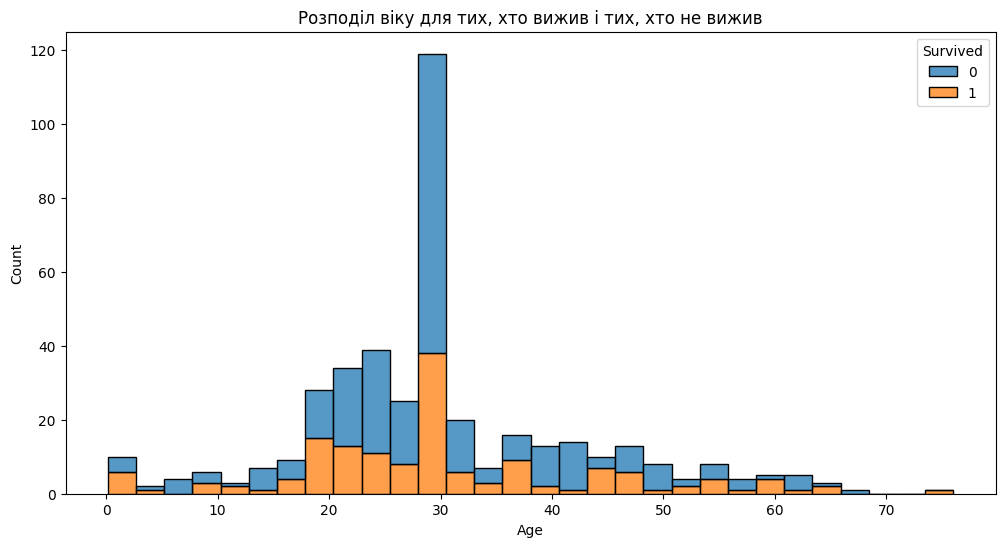

In [144]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Розподіл віку для тих, хто вижив і тих, хто не вижив')
plt.show()

21. Обчисліть відсоток виживання для кожної комбінації статі та класу
(наприклад, жінки в 1-му класі, чоловіки в 3-му класі). Яка група
мала найвищий рівень виживання (дати відповідь)?

In [145]:
survival_by_sex_pclass = df.groupby(['Sex', 'Pclass'])['Survived'].mean()
print(f'Відсоток виживання за комбінацією статі та класу:\n{survival_by_sex_pclass}')

Відсоток виживання за комбінацією статі та класу:
Sex  Pclass
0    1         0.0
     2         0.0
     3         0.0
1    1         1.0
     2         1.0
     3         1.0
Name: Survived, dtype: float64


22.Обчисліть кореляцію між усіма числовими змінними (Survived,
Pclass, Age, Fare). Які змінні найбільш сильно корелюють з
виживанням (дати відповідь)?

In [146]:
correlation = df[['Survived', 'Pclass', 'Age', 'Fare']].corr()
print(f'Кореляція між числовими змінними:\n{correlation}')

Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare
Survived  1.000000 -0.108615 -0.000011  0.191382
Pclass   -0.108615  1.000000 -0.440782 -0.576619
Age      -0.000011 -0.440782  1.000000  0.326800
Fare      0.191382 -0.576619  0.326800  1.000000


Висновок : Я навчився проводити попередній аналіз даних, включаючи обробку пропущених значень, видалення дублікатів, трансформацію категоріальних ознак та виконання статистичних і візуальних аналізів для виявлення факторів, що вплинули на виживання пасажирів на Титаніку.